In [3]:
import numpy as np

In [2]:
# 確率的勾配降下法で重みを勾配*学習率で修正（引く）
# 重み = 重み - 学習率*勾配
class SCD:
    def __init__(self,lr=0.01):
        self.lr = lr
    
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            
# 弱点はUみたいな形状(等方的じゃ等方的でない)だと振動する

In [ ]:
# パラメータの更新は学習クラスと分けて実装する
# 切り替えが容易
# 確率的勾配降下法の代わり
# Momenrtum、AdaGrad、Adam

In [3]:
# Momenrtum
# 勾配に対して力が働くと考える
# 速度 = 係数*速度 － 学習率*勾配
# 係数は摩擦的な
# 重み = 重み - 速度
class Momentum:
    def __init__(self,lr=0.01,momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v = self.momentum * self.v - self.lr * grads[key]
            params[key] += self.v
#  力のつり合いみたいに勾配方向の力を受けるから振動が少ない

In [4]:
# AdaGrad
# 学習率を減衰
# 最初は大きく、徐々に小さく
# h +=  勾配 * 勾配
# 重み = 重み - (学習率* 1/√h) * 勾配
# 進めば進むほど動いた量が蓄積されて更新度が少なくなる
# 無限回やっても大丈夫になるように考えた→RMSProp
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
#           1e-7で0除算を避けている
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [ ]:
# AdaGredとMomentumのあわせ
# Adam
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

===========iteration:0===========
SGD:2.3762172591854505
Momentum:2.423854277144973
AdaGrad:2.0314075025729066
Adam:2.2795733984306517
===========iteration:100===========
SGD:1.6950394597749705
Momentum:0.32910209075410496
AdaGrad:0.1324529481790881
Adam:0.25344560718355325
===========iteration:200===========
SGD:0.8998997776158173
Momentum:0.23371280225793994
AdaGrad:0.09795468398523263
Adam:0.17487012304669264
===========iteration:300===========
SGD:0.45728713220476813
Momentum:0.12689458039683946
AdaGrad:0.05899797391030809
Adam:0.09005181672316012
===========iteration:400===========
SGD:0.45176921080678056
Momentum:0.17305348270185172
AdaGrad:0.05059576114896047
Adam:0.13109193251924123
===========iteration:500===========
SGD:0.512646044529457
Momentum:0.1979438976461334
AdaGrad:0.08345352083578271
Adam:0.133828237436401
===========iteration:600===========
SGD:0.32827204666639975
Momentum:0.1877706584548271
AdaGrad:0.0871175283118527
Adam:0.13326964615683584
===========iteration:70

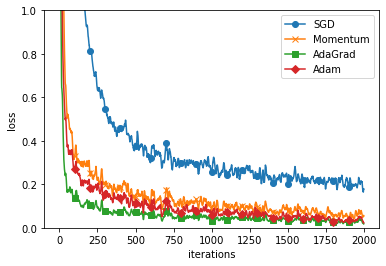

In [15]:
# 更新手法の比較→横軸：繰り返し回数、縦軸：損失関数
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [1]:
# 重みの初期値は大切
# 勾配消失
# 0または全部一緒(教科書だと均一)にする→更新の時に同じ値にされる
# 自分で設定せずに標準偏差でランダムに設定する
# 標準偏差：平均値の土標準偏差の範囲でいる人が多い
# 各層のアクティベーション(活性化関数の後の出力データ)
# シグモイド関数で重みをガウス分布の標準偏差を１でランダム設定→アクティベーションが0と1に偏る→勾配の値が小さくなる→勾配消失
# よくない
# 考察
# シグモイドの逆関数はｙ(1-y)で0と1だと0になるから
# 重みの偏差を0.01に→アクティベーションが0.5に集中→複数のニューロンの意味なし
# １個でも２個でも同じ値なら意味ないやん

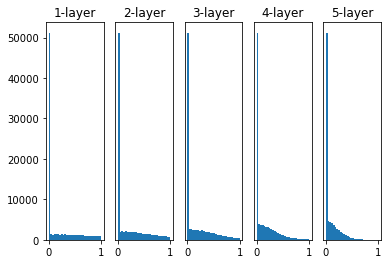

In [14]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [ ]:
# Xavier Glorotの推奨する初期値→「Xavierの初期値」
# 前層のノードがn個で1/√nの標準偏差
# sigmoid関数だといびつになる
# tanh関数だとOK→sigmoidは(0,0.5)で対称なS字だけど
# tanhは(0,0)で対称→活性化関数は原点対象がいいらしい
# 活性化関数が線形であることが前提

In [ ]:
# ReLUの場合の重みの初期値
# Kaiming Heの推奨する初期値→「Heの初期値」
# 前層のノードがn個で2/√nの標準偏差

===========iteration:0===========
std=0.01:2.302527605777674
Xavier:2.287089411191719
He:2.4333099199638664
===========iteration:100===========
std=0.01:2.3013014176348903
Xavier:2.233687229053235
He:1.3255466781100829
===========iteration:200===========
std=0.01:2.303301840330502
Xavier:2.1503841797239582
He:0.7964701340471095
===========iteration:300===========
std=0.01:2.300904815285543
Xavier:1.8003448102705693
He:0.4792436093427712
===========iteration:400===========
std=0.01:2.300946639695927
Xavier:1.327223368699212
He:0.41908417435752304
===========iteration:500===========
std=0.01:2.299641794767657
Xavier:0.8517282507764656
He:0.3268955719764677
===========iteration:600===========
std=0.01:2.3009280034979662
Xavier:0.7000121068869032
He:0.35924983315481746
===========iteration:700===========
std=0.01:2.3019074645919746
Xavier:0.5790395599982658
He:0.27283836833990316
===========iteration:800===========
std=0.01:2.2977530273410247
Xavier:0.45805300850431174
He:0.266010516592509

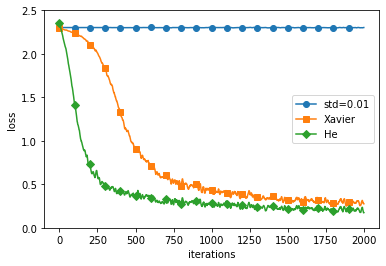

In [16]:
# ReLU関数の重みパラメータ初期値の比較→横軸：繰り返し回数、縦軸：損失関数
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [ ]:
# 初期値が大切だよ
# でも各層のアクティベーションの分布を後から調整すればいいのでは？
# Batch Normalizationっていう
# データ分布の正規化を実施するレイヤを挿入する
# ミニバッチ毎に正規化する↓
# ｍ個の入力データに対して平均と分散を求める
# 平均が0、分散が1になるようにする。
# メリット
# 学習係数を大きくできる(学習を早く進行できる)
# 初期値に依存しない
# 過学習を抑制する
# 入力→アフィン→BatchNorm→ReLU→…→アフィン→Softmax

============== 1/16 ==============
epoch:0 | 0.117 - 0.108
epoch:1 | 0.097 - 0.116


C:\Users\YamamotoK\pythonAI\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\YamamotoK\pythonAI\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\YamamotoK\pythonAI\common\functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:2 | 0.097 - 0.128
epoch:3 | 0.097 - 0.119
epoch:4 | 0.097 - 0.154
epoch:5 | 0.097 - 0.17
epoch:6 | 0.097 - 0.187
epoch:7 | 0.097 - 0.212
epoch:8 | 0.097 - 0.232
epoch:9 | 0.097 - 0.251
epoch:10 | 0.097 - 0.274
epoch:11 | 0.097 - 0.292
epoch:12 | 0.097 - 0.303
epoch:13 | 0.097 - 0.321
epoch:14 | 0.097 - 0.341
epoch:15 | 0.097 - 0.349
epoch:16 | 0.097 - 0.366
epoch:17 | 0.097 - 0.382
epoch:18 | 0.097 - 0.392


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.409
============== 2/16 ==============
epoch:0 | 0.087 - 0.087
epoch:1 | 0.097 - 0.1


C:\Users\YamamotoK\pythonAI\common\functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:2 | 0.097 - 0.101
epoch:3 | 0.097 - 0.111
epoch:4 | 0.097 - 0.13
epoch:5 | 0.097 - 0.151
epoch:6 | 0.097 - 0.175
epoch:7 | 0.097 - 0.205
epoch:8 | 0.097 - 0.236
epoch:9 | 0.097 - 0.263
epoch:10 | 0.097 - 0.289
epoch:11 | 0.097 - 0.309
epoch:12 | 0.097 - 0.325
epoch:13 | 0.097 - 0.342
epoch:14 | 0.097 - 0.366
epoch:15 | 0.097 - 0.381
epoch:16 | 0.097 - 0.396
epoch:17 | 0.097 - 0.414


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.425
epoch:19 | 0.097 - 0.449
============== 3/16 ==============
epoch:0 | 0.094 - 0.093
epoch:1 | 0.327 - 0.104
epoch:2 | 0.529 - 0.14
epoch:3 | 0.632 - 0.186
epoch:4 | 0.697 - 0.214
epoch:5 | 0.751 - 0.244
epoch:6 | 0.791 - 0.286
epoch:7 | 0.83 - 0.305
epoch:8 | 0.862 - 0.338
epoch:9 | 0.887 - 0.376
epoch:10 | 0.91 - 0.395
epoch:11 | 0.924 - 0.423
epoch:12 | 0.938 - 0.459
epoch:13 | 0.942 - 0.473
epoch:14 | 0.952 - 0.496
epoch:15 | 0.96 - 0.529
epoch:16 | 0.97 - 0.561
epoch:17 | 0.97 - 0.57
epoch:18 | 0.976 - 0.603


No handles with labels found to put in legend.


epoch:19 | 0.98 - 0.609
============== 4/16 ==============
epoch:0 | 0.093 - 0.1
epoch:1 | 0.237 - 0.124
epoch:2 | 0.371 - 0.185
epoch:3 | 0.477 - 0.246
epoch:4 | 0.564 - 0.309
epoch:5 | 0.586 - 0.369
epoch:6 | 0.645 - 0.443
epoch:7 | 0.672 - 0.501
epoch:8 | 0.691 - 0.55
epoch:9 | 0.716 - 0.593
epoch:10 | 0.741 - 0.621
epoch:11 | 0.757 - 0.652
epoch:12 | 0.77 - 0.679
epoch:13 | 0.793 - 0.696
epoch:14 | 0.793 - 0.71
epoch:15 | 0.814 - 0.729
epoch:16 | 0.831 - 0.749
epoch:17 | 0.839 - 0.769
epoch:18 | 0.845 - 0.779


No handles with labels found to put in legend.


epoch:19 | 0.86 - 0.784
============== 5/16 ==============
epoch:0 | 0.118 - 0.084
epoch:1 | 0.12 - 0.154
epoch:2 | 0.119 - 0.292
epoch:3 | 0.119 - 0.415
epoch:4 | 0.119 - 0.521
epoch:5 | 0.121 - 0.577
epoch:6 | 0.122 - 0.627
epoch:7 | 0.123 - 0.682
epoch:8 | 0.125 - 0.711
epoch:9 | 0.133 - 0.731
epoch:10 | 0.136 - 0.758
epoch:11 | 0.139 - 0.776
epoch:12 | 0.15 - 0.79
epoch:13 | 0.149 - 0.805
epoch:14 | 0.164 - 0.826
epoch:15 | 0.182 - 0.837
epoch:16 | 0.193 - 0.85
epoch:17 | 0.197 - 0.865


No handles with labels found to put in legend.


epoch:18 | 0.205 - 0.867
epoch:19 | 0.211 - 0.879
============== 6/16 ==============
epoch:0 | 0.105 - 0.143
epoch:1 | 0.108 - 0.201
epoch:2 | 0.116 - 0.471
epoch:3 | 0.102 - 0.604
epoch:4 | 0.104 - 0.67
epoch:5 | 0.11 - 0.727
epoch:6 | 0.115 - 0.76
epoch:7 | 0.117 - 0.785
epoch:8 | 0.117 - 0.799
epoch:9 | 0.117 - 0.823
epoch:10 | 0.117 - 0.851
epoch:11 | 0.117 - 0.863
epoch:12 | 0.117 - 0.875
epoch:13 | 0.117 - 0.894
epoch:14 | 0.117 - 0.905
epoch:15 | 0.117 - 0.915
epoch:16 | 0.117 - 0.926
epoch:17 | 0.117 - 0.933


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.941
epoch:19 | 0.117 - 0.948
============== 7/16 ==============
epoch:0 | 0.091 - 0.098
epoch:1 | 0.117 - 0.301
epoch:2 | 0.117 - 0.564
epoch:3 | 0.117 - 0.652
epoch:4 | 0.117 - 0.705
epoch:5 | 0.117 - 0.751
epoch:6 | 0.117 - 0.806
epoch:7 | 0.117 - 0.833
epoch:8 | 0.117 - 0.85
epoch:9 | 0.117 - 0.877
epoch:10 | 0.117 - 0.909
epoch:11 | 0.117 - 0.924
epoch:12 | 0.117 - 0.942
epoch:13 | 0.117 - 0.943
epoch:14 | 0.117 - 0.961
epoch:15 | 0.117 - 0.968
epoch:16 | 0.117 - 0.971
epoch:17 | 0.117 - 0.975
epoch:18 | 0.117 - 0.981


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.983
============== 8/16 ==============
epoch:0 | 0.117 - 0.191
epoch:1 | 0.092 - 0.352
epoch:2 | 0.117 - 0.634
epoch:3 | 0.117 - 0.746
epoch:4 | 0.117 - 0.786
epoch:5 | 0.117 - 0.831
epoch:6 | 0.117 - 0.914
epoch:7 | 0.117 - 0.94
epoch:8 | 0.117 - 0.965
epoch:9 | 0.116 - 0.971
epoch:10 | 0.116 - 0.983
epoch:11 | 0.116 - 0.988
epoch:12 | 0.116 - 0.994
epoch:13 | 0.116 - 0.998
epoch:14 | 0.116 - 0.998
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 9/16 ==============
epoch:0 | 0.097 - 0.109
epoch:1 | 0.116 - 0.426
epoch:2 | 0.116 - 0.665
epoch:3 | 0.116 - 0.751
epoch:4 | 0.116 - 0.798
epoch:5 | 0.116 - 0.836
epoch:6 | 0.116 - 0.874
epoch:7 | 0.117 - 0.919
epoch:8 | 0.117 - 0.967
epoch:9 | 0.117 - 0.989
epoch:10 | 0.117 - 0.994
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.156
epoch:1 | 0.117 - 0.584
epoch:2 | 0.116 - 0.721
epoch:3 | 0.117 - 0.741
epoch:4 | 0.116 - 0.789
epoch:5 | 0.117 - 0.791
epoch:6 | 0.117 - 0.804
epoch:7 | 0.117 - 0.903
epoch:8 | 0.117 - 0.973
epoch:9 | 0.117 - 0.978
epoch:10 | 0.117 - 0.986
epoch:11 | 0.117 - 0.955
epoch:12 | 0.117 - 0.978
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 11/16 ==============
epoch:0 | 0.099 - 0.107
epoch:1 | 0.117 - 0.626
epoch:2 | 0.117 - 0.746
epoch:3 | 0.117 - 0.769
epoch:4 | 0.116 - 0.701
epoch:5 | 0.117 - 0.815
epoch:6 | 0.116 - 0.812
epoch:7 | 0.116 - 0.801
epoch:8 | 0.116 - 0.868
epoch:9 | 0.116 - 0.866
epoch:10 | 0.116 - 0.966
epoch:11 | 0.116 - 0.976
epoch:12 | 0.116 - 0.984
epoch:13 | 0.116 - 0.984
epoch:14 | 0.116 - 0.987
epoch:15 | 0.116 - 0.982
epoch:16 | 0.116 - 0.991
epoch:17 | 0.116 - 0.988
epoch:18 | 0.116 - 0.994


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.918
============== 12/16 ==============
epoch:0 | 0.1 - 0.201
epoch:1 | 0.116 - 0.42
epoch:2 | 0.116 - 0.513
epoch:3 | 0.117 - 0.469
epoch:4 | 0.117 - 0.717
epoch:5 | 0.117 - 0.774
epoch:6 | 0.117 - 0.86
epoch:7 | 0.117 - 0.866
epoch:8 | 0.117 - 0.881
epoch:9 | 0.117 - 0.857
epoch:10 | 0.117 - 0.884
epoch:11 | 0.117 - 0.889
epoch:12 | 0.117 - 0.892
epoch:13 | 0.117 - 0.893
epoch:14 | 0.117 - 0.893
epoch:15 | 0.117 - 0.892
epoch:16 | 0.117 - 0.893
epoch:17 | 0.117 - 0.894
epoch:18 | 0.117 - 0.939


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.989
============== 13/16 ==============
epoch:0 | 0.105 - 0.127
epoch:1 | 0.116 - 0.397
epoch:2 | 0.116 - 0.557
epoch:3 | 0.116 - 0.587
epoch:4 | 0.116 - 0.637
epoch:5 | 0.116 - 0.565
epoch:6 | 0.116 - 0.644
epoch:7 | 0.116 - 0.669
epoch:8 | 0.117 - 0.641
epoch:9 | 0.117 - 0.455
epoch:10 | 0.117 - 0.679
epoch:11 | 0.117 - 0.663
epoch:12 | 0.117 - 0.675
epoch:13 | 0.117 - 0.684
epoch:14 | 0.117 - 0.704
epoch:15 | 0.117 - 0.709
epoch:16 | 0.117 - 0.609
epoch:17 | 0.117 - 0.697


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.692
epoch:19 | 0.117 - 0.711
============== 14/16 ==============
epoch:0 | 0.099 - 0.149
epoch:1 | 0.117 - 0.404
epoch:2 | 0.117 - 0.452
epoch:3 | 0.117 - 0.488
epoch:4 | 0.117 - 0.499
epoch:5 | 0.117 - 0.495
epoch:6 | 0.117 - 0.497
epoch:7 | 0.117 - 0.516
epoch:8 | 0.117 - 0.521
epoch:9 | 0.116 - 0.509
epoch:10 | 0.116 - 0.553
epoch:11 | 0.116 - 0.513
epoch:12 | 0.117 - 0.523
epoch:13 | 0.117 - 0.52
epoch:14 | 0.117 - 0.603
epoch:15 | 0.117 - 0.596
epoch:16 | 0.117 - 0.593
epoch:17 | 0.117 - 0.524
epoch:18 | 0.117 - 0.523


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.523
============== 15/16 ==============
epoch:0 | 0.099 - 0.096
epoch:1 | 0.117 - 0.369
epoch:2 | 0.117 - 0.394
epoch:3 | 0.116 - 0.461
epoch:4 | 0.117 - 0.505
epoch:5 | 0.117 - 0.515
epoch:6 | 0.116 - 0.511
epoch:7 | 0.116 - 0.475
epoch:8 | 0.116 - 0.512
epoch:9 | 0.116 - 0.523
epoch:10 | 0.116 - 0.524
epoch:11 | 0.117 - 0.527
epoch:12 | 0.117 - 0.523
epoch:13 | 0.117 - 0.525
epoch:14 | 0.117 - 0.528
epoch:15 | 0.117 - 0.528
epoch:16 | 0.117 - 0.528
epoch:17 | 0.117 - 0.528


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.527
epoch:19 | 0.117 - 0.528
============== 16/16 ==============
epoch:0 | 0.117 - 0.2
epoch:1 | 0.116 - 0.213
epoch:2 | 0.116 - 0.352
epoch:3 | 0.117 - 0.118
epoch:4 | 0.116 - 0.412
epoch:5 | 0.116 - 0.407
epoch:6 | 0.116 - 0.409
epoch:7 | 0.116 - 0.415
epoch:8 | 0.116 - 0.42
epoch:9 | 0.116 - 0.426
epoch:10 | 0.116 - 0.424
epoch:11 | 0.117 - 0.429
epoch:12 | 0.116 - 0.423
epoch:13 | 0.116 - 0.43
epoch:14 | 0.117 - 0.417
epoch:15 | 0.117 - 0.424
epoch:16 | 0.117 - 0.421
epoch:17 | 0.117 - 0.41
epoch:18 | 0.117 - 0.42
epoch:19 | 0.117 - 0.425


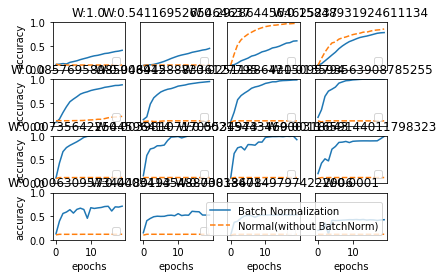

In [17]:
# 使用と不使用の比較：いろんな初期値で試してみた
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()
# 大体のところで使えることがわかる

In [ ]:
# 過学習について
# 理由
# パラメータをたくさん持ち表現力が高いモデルである
# 訓練データが少ない

# 今回はそれをやってみる
# 訓練画像が300個
# 7層のネットワーク
# 各層100個のニューロン
# 活性化関数はReLU

epoch:0, train acc:0.09333333333333334, test acc:0.0915
epoch:1, train acc:0.09333333333333334, test acc:0.0886
epoch:2, train acc:0.09666666666666666, test acc:0.0854
epoch:3, train acc:0.09, test acc:0.0817
epoch:4, train acc:0.10666666666666667, test acc:0.0834
epoch:5, train acc:0.11666666666666667, test acc:0.0894
epoch:6, train acc:0.14333333333333334, test acc:0.097
epoch:7, train acc:0.15333333333333332, test acc:0.1119
epoch:8, train acc:0.19666666666666666, test acc:0.1289
epoch:9, train acc:0.26, test acc:0.1624
epoch:10, train acc:0.29333333333333333, test acc:0.1877
epoch:11, train acc:0.3333333333333333, test acc:0.2021
epoch:12, train acc:0.4066666666666667, test acc:0.2376
epoch:13, train acc:0.43, test acc:0.2693
epoch:14, train acc:0.4533333333333333, test acc:0.2917
epoch:15, train acc:0.48, test acc:0.3147
epoch:16, train acc:0.49333333333333335, test acc:0.3285
epoch:17, train acc:0.5066666666666667, test acc:0.3449
epoch:18, train acc:0.5133333333333333, test acc:

epoch:159, train acc:0.89, test acc:0.7055
epoch:160, train acc:0.8933333333333333, test acc:0.7007
epoch:161, train acc:0.89, test acc:0.699
epoch:162, train acc:0.88, test acc:0.6872
epoch:163, train acc:0.8933333333333333, test acc:0.6913
epoch:164, train acc:0.88, test acc:0.6954
epoch:165, train acc:0.8833333333333333, test acc:0.687
epoch:166, train acc:0.8833333333333333, test acc:0.6924
epoch:167, train acc:0.8933333333333333, test acc:0.6928
epoch:168, train acc:0.89, test acc:0.7005
epoch:169, train acc:0.8966666666666666, test acc:0.699
epoch:170, train acc:0.89, test acc:0.7017
epoch:171, train acc:0.8933333333333333, test acc:0.6943
epoch:172, train acc:0.8933333333333333, test acc:0.6959
epoch:173, train acc:0.8966666666666666, test acc:0.6987
epoch:174, train acc:0.8866666666666667, test acc:0.6986
epoch:175, train acc:0.8933333333333333, test acc:0.6967
epoch:176, train acc:0.8966666666666666, test acc:0.7008
epoch:177, train acc:0.8933333333333333, test acc:0.6855
epoc

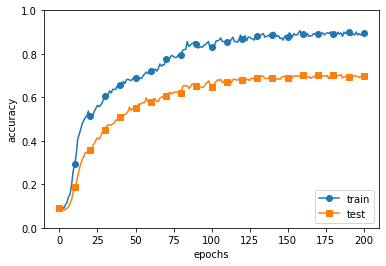

In [18]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = [] # エポック単位での認識精度
train_acc_list = [] # エポック単位での認識精度
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 学習した画像だと正答率が100％になってるけど
# 検証(テスト)用でやると70％が限界
# 過学習は重みパラメータが大きな値をとることで発生することが多い

In [33]:
# Weight decay
# 大きな重みパラメータにペナルティを課す
# 重みの損失関数に1/2*λ*W^2を加算
# λ：ハイパーパラメータ(自分で決める)で大きければペナルティが大きい
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class MultiLayerNet:
    """全結合による多層ニューラルネットワーク

    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    weight_decay_lambda : Weight Decay（L2ノルム）の強さ
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """重みの初期値設定

        Parameters
        ----------
        weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
            'relu'または'he'を指定した場合は「Heの初期値」を設定
            'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        損失関数の値
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads

epoch:0, train acc:0.095, test acc:0.0855
epoch:1, train acc:0.132, test acc:0.1059
epoch:2, train acc:0.18, test acc:0.1473
epoch:3, train acc:0.228, test acc:0.2043
epoch:4, train acc:0.3, test acc:0.2628
epoch:5, train acc:0.382, test acc:0.3199
epoch:6, train acc:0.471, test acc:0.3979
epoch:7, train acc:0.509, test acc:0.4345
epoch:8, train acc:0.549, test acc:0.4596
epoch:9, train acc:0.563, test acc:0.4754
epoch:10, train acc:0.571, test acc:0.4909
epoch:11, train acc:0.629, test acc:0.5444
epoch:12, train acc:0.625, test acc:0.547
epoch:13, train acc:0.648, test acc:0.5612
epoch:14, train acc:0.657, test acc:0.5752
epoch:15, train acc:0.693, test acc:0.5878
epoch:16, train acc:0.687, test acc:0.5795
epoch:17, train acc:0.705, test acc:0.6096
epoch:18, train acc:0.716, test acc:0.6352
epoch:19, train acc:0.738, test acc:0.646
epoch:20, train acc:0.746, test acc:0.6394
epoch:21, train acc:0.747, test acc:0.6513
epoch:22, train acc:0.764, test acc:0.6696
epoch:23, train acc:0.758,

epoch:190, train acc:0.848, test acc:0.7838
epoch:191, train acc:0.855, test acc:0.7829
epoch:192, train acc:0.858, test acc:0.7844
epoch:193, train acc:0.853, test acc:0.7802
epoch:194, train acc:0.842, test acc:0.7803
epoch:195, train acc:0.852, test acc:0.7791
epoch:196, train acc:0.858, test acc:0.7845
epoch:197, train acc:0.85, test acc:0.7796
epoch:198, train acc:0.856, test acc:0.7823
epoch:199, train acc:0.849, test acc:0.7784
epoch:200, train acc:0.845, test acc:0.7759


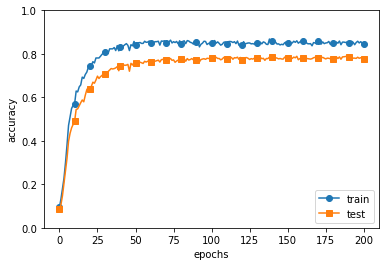

In [51]:
# デコイがある
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

# weight decay（荷重減衰）の設定 =======================
# weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
# 学習とテストで差が少なくなった
# 訓練データを多くしたら
# 差が少なくなってるし
# 学習で100％はなくなった

In [ ]:
# Dropout
# Weightdecayは簡単に実装できるけど
# ニュートラルネットが複雑になってくると対応が難しくなる
# ニューロンをランダムで削除する
# 信号の伝達が行われなくなる
# 訓練時：消去するニューロンを選ぶ
# テスト時：各ニューロンの出力に対して訓練時に削除した割合を乗算して出力する。

train loss:2.3011065318291792
=== epoch:1, train acc:0.10666666666666667, test acc:0.0976 ===
train loss:2.3131352062276562
train loss:2.3045978880704197
train loss:2.3135908759050694
=== epoch:2, train acc:0.10333333333333333, test acc:0.095 ===
train loss:2.3083368886377755
train loss:2.3048944868932604
train loss:2.299761693543093
=== epoch:3, train acc:0.09666666666666666, test acc:0.0977 ===
train loss:2.3050484160833467
train loss:2.3157232526935814
train loss:2.3129812452995044
=== epoch:4, train acc:0.09, test acc:0.0969 ===
train loss:2.306614403567649
train loss:2.298359876380846
train loss:2.299623084786793
=== epoch:5, train acc:0.09, test acc:0.0976 ===
train loss:2.293806600197739
train loss:2.316169565568036
train loss:2.3023633873640086
=== epoch:6, train acc:0.1, test acc:0.0995 ===
train loss:2.3059605063892934
train loss:2.303842095876969
train loss:2.301554569086105
=== epoch:7, train acc:0.09666666666666666, test acc:0.1002 ===
train loss:2.30044414141305
train los

train loss:2.2748461923708563
train loss:2.2698450341712153
train loss:2.28480902600349
=== epoch:57, train acc:0.23666666666666666, test acc:0.2023 ===
train loss:2.2800698383983558
train loss:2.26516032263586
train loss:2.288546991774021
=== epoch:58, train acc:0.23333333333333334, test acc:0.2037 ===
train loss:2.2735847075763367
train loss:2.2777493517605776
train loss:2.2727533311088837
=== epoch:59, train acc:0.23666666666666666, test acc:0.2032 ===
train loss:2.274372097085862
train loss:2.269233792613105
train loss:2.274473141654713
=== epoch:60, train acc:0.23, test acc:0.2028 ===
train loss:2.2920129153725424
train loss:2.2714669934039398
train loss:2.2610135158719835
=== epoch:61, train acc:0.23333333333333334, test acc:0.203 ===
train loss:2.2751736156366857
train loss:2.269957708279167
train loss:2.2567764555151397
=== epoch:62, train acc:0.24, test acc:0.2017 ===
train loss:2.2658497149433945
train loss:2.268530875419669
train loss:2.2760857466765403
=== epoch:63, train a

=== epoch:112, train acc:0.2633333333333333, test acc:0.2188 ===
train loss:2.2370544725070154
train loss:2.245618108743485
train loss:2.2317113110293136
=== epoch:113, train acc:0.26666666666666666, test acc:0.2209 ===
train loss:2.208999213667098
train loss:2.250416254288251
train loss:2.241605847527876
=== epoch:114, train acc:0.2633333333333333, test acc:0.2191 ===
train loss:2.2317486646850146
train loss:2.2295058834739576
train loss:2.242603201541887
=== epoch:115, train acc:0.26, test acc:0.2206 ===
train loss:2.240186227522384
train loss:2.2482204389735267
train loss:2.2286152943334687
=== epoch:116, train acc:0.26666666666666666, test acc:0.2214 ===
train loss:2.2183295218882724
train loss:2.245101820902848
train loss:2.237276077797912
=== epoch:117, train acc:0.2633333333333333, test acc:0.2217 ===
train loss:2.2168521715194554
train loss:2.2246737250463084
train loss:2.2513749684477964
=== epoch:118, train acc:0.27, test acc:0.2245 ===
train loss:2.218714899043929
train loss

=== epoch:167, train acc:0.31666666666666665, test acc:0.251 ===
train loss:2.1717895003358665
train loss:2.1528402079395024
train loss:2.1372763679419258
=== epoch:168, train acc:0.3233333333333333, test acc:0.252 ===
train loss:2.144135454167905
train loss:2.194637791006624
train loss:2.1268180956787854
=== epoch:169, train acc:0.3233333333333333, test acc:0.2538 ===
train loss:2.140707702762213
train loss:2.1365538835631614
train loss:2.1484417092005192
=== epoch:170, train acc:0.3233333333333333, test acc:0.2561 ===
train loss:2.171600979978857
train loss:2.1253057649885876
train loss:2.145132734321494
=== epoch:171, train acc:0.31666666666666665, test acc:0.2557 ===
train loss:2.1292164860695206
train loss:2.1455010874419083
train loss:2.1502999991888836
=== epoch:172, train acc:0.31666666666666665, test acc:0.254 ===
train loss:2.1689776229110804
train loss:2.165667354612266
train loss:2.168655904999152
=== epoch:173, train acc:0.32666666666666666, test acc:0.2607 ===
train loss:

=== epoch:222, train acc:0.44, test acc:0.3319 ===
train loss:2.027697536786551
train loss:2.038780057213175
train loss:1.969197860498179
=== epoch:223, train acc:0.4533333333333333, test acc:0.3347 ===
train loss:1.9575297506460816
train loss:1.9566573810883943
train loss:1.9386536197542288
=== epoch:224, train acc:0.4533333333333333, test acc:0.3367 ===
train loss:1.9062896609008289
train loss:2.0339468838953625
train loss:1.9055605905038744
=== epoch:225, train acc:0.4533333333333333, test acc:0.3375 ===
train loss:1.930149691812736
train loss:2.0238527975532787
train loss:2.0506220925286764
=== epoch:226, train acc:0.46, test acc:0.3403 ===
train loss:1.9331040504986077
train loss:1.9645270286300096
train loss:2.000535721078491
=== epoch:227, train acc:0.46, test acc:0.3432 ===
train loss:2.0470713929920312
train loss:1.9726911646017868
train loss:1.8810680774057398
=== epoch:228, train acc:0.45666666666666667, test acc:0.342 ===
train loss:1.9048150844570122
train loss:1.920534228

train loss:1.7094998337278915
train loss:1.7426961367326077
train loss:1.695415401221854
=== epoch:278, train acc:0.5066666666666667, test acc:0.3946 ===
train loss:1.7390179518062256
train loss:1.6917849245569576
train loss:1.7077529277763335
=== epoch:279, train acc:0.5166666666666667, test acc:0.3987 ===
train loss:1.6546477631128655
train loss:1.730605884726445
train loss:1.6980924295218855
=== epoch:280, train acc:0.5133333333333333, test acc:0.399 ===
train loss:1.7559856905947258
train loss:1.819323042601146
train loss:1.7138302835765087
=== epoch:281, train acc:0.52, test acc:0.403 ===
train loss:1.7015838721007075
train loss:1.6931487600198176
train loss:1.7418145601071433
=== epoch:282, train acc:0.5233333333333333, test acc:0.4036 ===
train loss:1.67209395125712
train loss:1.7402021306207525
train loss:1.614943472079263
=== epoch:283, train acc:0.52, test acc:0.4057 ===
train loss:1.7130374132451933
train loss:1.6630400296510421
train loss:1.665262653523608
=== epoch:284, tr

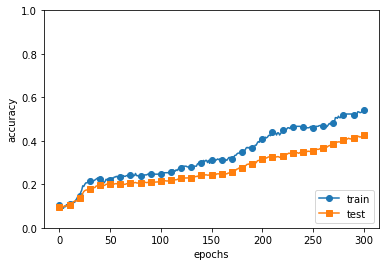

In [58]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
# 学習データを増やすと差が減る
# ドロップ率の値を増やすと正答率が減る

In [ ]:
# アンサンブル学習
# 複数のネットワーク(同じか似た構造)をそれぞれ学習させて推論時に複数の出力を平均にする
# これで認証精度が数％向上する
# dropで毎回ランダムに削除する→異なるモデルを学習させてる
# 消去した割合をかけて平均を出している
# アンサンブル学習を一つのネットワークで実現している

In [ ]:
# ハイパーパラメータの検証
# 自分で決まる値まとめ
# 学習率
# バッチサイズ
# 各層のニューロン数
# Weight decay
# 精度に直結する重要な数字
# 何がいいかは考える、検証の必要がある。
# これにテストデータを使ってはいけない
# テストデータによっちゃう
# 訓練データ：パラメータ(重みやバイアス)の学習
# 検証データ：ハイパーパラメータの学習
# テストデータ：汎化性能(見たことないものを推測できるか)を検証

In [ ]:
# 検証データは学習データの20％程度を抽出する
# 今後の注意点
# 訓練データは規則的に入ってることがある(1,2,3,4...1,2,3,4...とかあ、い、う、あ…)
# シャッフルして使ったほうがいい

In [ ]:
# ディープラーニングの学習は時間がかかる(数日から数週間)
# ハイパーパラメータの最適化はダメそうなら見切りをつける
# ハイパーパラメータの最適化手順
# １．ざっくり(10＾-3～10＾3)ぐらい(logスケール)で範囲を決める
# 2．決めた範囲からランダムにサンプリングする(決める)
# 3．決めた数値から検証データでの認識精度を評価(エポックは小さく)
# 4．ある程度(100回など)２，３を繰り返し、認識精度から範囲を狭める
# ある程度やったらパラメータの値を一つ選ぶ

val acc:0.12 | lr:0.0010289033949658186, weight decay:6.755967126388308e-06
val acc:0.2 | lr:5.034600038750633e-05, weight decay:1.0387204588628904e-07
val acc:0.38 | lr:0.0035174421399092317, weight decay:6.039928181549485e-05
val acc:0.1 | lr:0.00026885960517172895, weight decay:3.3502036318281646e-05
val acc:0.06 | lr:1.1501866253934389e-06, weight decay:3.3317386844712577e-06
val acc:0.12 | lr:0.0005991104547780785, weight decay:3.77963816108432e-05
val acc:0.11 | lr:3.0437155973064336e-06, weight decay:1.0681959891917626e-07
val acc:0.8 | lr:0.009870877396646226, weight decay:7.775096467508336e-07
val acc:0.13 | lr:4.912150224772528e-05, weight decay:5.560043846737446e-06
val acc:0.09 | lr:8.645046603693352e-06, weight decay:1.6667979676334034e-08
val acc:0.08 | lr:1.112472156491393e-06, weight decay:9.362028134230215e-05
val acc:0.16 | lr:0.00042076884533302463, weight decay:1.2409413371348086e-08
val acc:0.09 | lr:7.747461538423239e-05, weight decay:3.535332063418403e-05
val acc

Best-15(val acc:0.63) | lr:0.004574779302116737, weight decay:1.063460831576597e-08
Best-16(val acc:0.63) | lr:0.003946556859839197, weight decay:1.0918375312996084e-07
Best-17(val acc:0.61) | lr:0.004816656193500587, weight decay:1.1979441346489213e-05
Best-18(val acc:0.59) | lr:0.0030463001645971892, weight decay:3.706452602696602e-06
Best-19(val acc:0.54) | lr:0.0033106090579592194, weight decay:3.63895688976308e-06
Best-20(val acc:0.49) | lr:0.002099438242634532, weight decay:8.68552818512544e-05


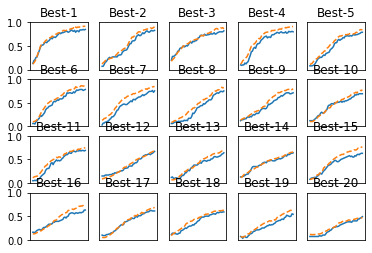

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()